In [1]:
import os

from csv import DictReader
from collections import defaultdict

import matplotlib.pyplot as plt

from base import load_all


In [2]:
patterns = list(load_all(open('../results/express/all.yaml')))
raw = list(DictReader(open('../results/express/repos-all-perf.csv')))

for row in raw:
    for key in ('pattern', 'tree size', 'tree depth', 'query length', 'hole count', 'parse time', 'search time'):
        row[key] = int(row[key])

    row['query'] = patterns[row['pattern']-1]['pattern']['stsearch']
    row['file size'] = os.stat('../' + row['file']).st_size


In [3]:
repos = defaultdict(int)

for row in raw:
    path = row['file'].split('/')
    repo = path[1] if not path[1].startswith('@') else os.path.join(*path[1:3])
    repos[(repo, row['pattern'])] += row['search time']


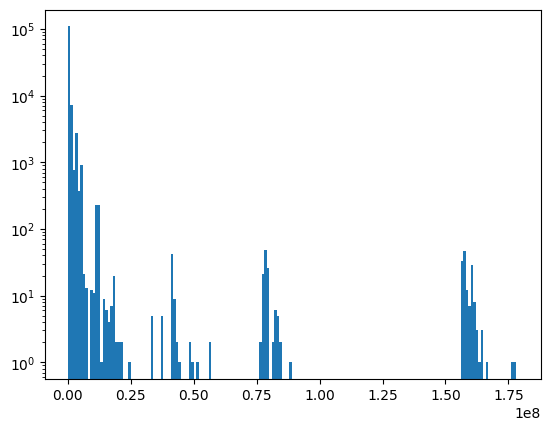

In [4]:
plt.hist(repos.values(), bins=[s*1e6 for s in range(180)])
plt.yscale('log')
plt.show()


In [8]:
INTERACTIVE = 1e6 # one second

f'{100 * sum(1 for repo, time in repos.items() if time < INTERACTIVE) / len(repos):.4}%'


'89.38%'

In [6]:
x, y, z, q, f, t = *zip(*((
    row['file size'], row['search time'], row['pattern'],
    row['query'], row['file'], row['search time']
) for row in raw)),


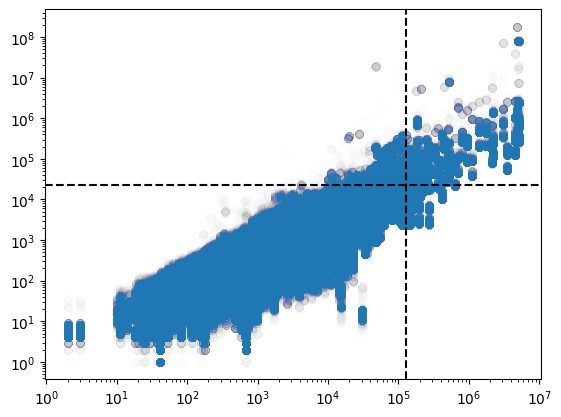

In [9]:
pi = lambda x, p: sorted(x)[len(x)*p//100]

plt.xscale('log')
plt.axvline(x=pi(x, 99), color='k', linestyle='--')
plt.yscale('log')
plt.axhline(y=pi(y, 99), color='k', linestyle='--')
plt.scatter(x, y, alpha=1/255)
plt.show()


In [ ]:
THRES = lambda x, y: 10*x + 1e6 < y

outs = defaultdict(lambda: defaultdict(list))
dups = defaultdict(set)

for i in filter(lambda i: THRES(x[i], y[i]), range(len(x))):
    file = x[i], os.path.basename(f[i])
    outs[q[i]][file].append(y[i])
    dups[file].add(f[i])


In [ ]:
for qi, qfs in outs.items():
    print(repr(qi))
    for (xi, bi), ys in sorted(qfs.items(), key=lambda t: t[0]):
        yi = sorted(ys)[len(ys)//2]
        print(f'\t{xi:.2E}B\t{bi:21}\t{yi:.2E}us\t{len(ys)}')


In [ ]:
for (xi, bi), fs in sorted(dups.items(), key=lambda t: len(t[1]), reverse=True):
    print(f'{xi:.2E}\t{bi:21}\t{len(fs)}')
    for fi in sorted(fs): print(f'\t{fi}')
